In [1]:
# Importing necessary libraries
import pandas as pd  # data manipulation and analysis
import matplotlib.pyplot as plt  # plotting and visualization
import re  # regular expressions
import string  # string manipulation
from nltk import download  # for downloading nltk data
from nltk.corpus import stopwords  # for stopwords
from nltk.stem import WordNetLemmatizer  # for word lemmatization
import seaborn as sns  # statistical data visualization

# Downloading required nltk data
download('stopwords')
download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rmora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Loading the dataset
df = pd.read_csv("../Data/ProjectTweets.csv", header=None)

# Display the first 5 rows of the dataset for a quick initial exploration
display(df.head())

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Display information about the dataset (data types, number of non-null values, etc.)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


None

### Note: 
It seems like there are no missing values in the dataset.  
I will add headers to the columns for a better understanding of the data.

### Dataset Columns:
- `IDs`: The id of the tweet (e.g., 4587)
- `Date`: The date of the tweet (e.g., Sat May 16 23:58:44 UTC 2009)
- `Flag`: The query (e.g., lyx). If there is no query, then this value is NO_QUERY.
- `user`: The user that tweeted (e.g., bobthebuilder)
- `text`: The text of the tweet (e.g., Lyx is cool)

In [4]:
# Define column names for the dataset
column_names = ["Index", "IDs", "Date", "Flag", "user", "text"]

# Reload the dataset with column names
df = pd.read_csv("../Data/ProjectTweets.csv", header=None, names=column_names)

# Display the first 5 rows of the dataset with column names
display(df.head())

,Index,IDs,Date,Flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Checking the number of unique values in 'Index' and 'IDs' columns
unique_index = df["Index"].nunique()
unique_ids = df["IDs"].nunique()

# Displaying the number of unique values
display(f"Number of unique values in 'Index': {unique_index}")
display(f"Number of unique values in 'IDs': {unique_ids}")

"Number of unique values in 'Index': 1600000"

"Number of unique values in 'IDs': 1598315"

### Notes on Unique Values:
- The first column, 'Index', seems to be just an index and therefore is not needed.
- The second column, 'IDs', appears to have a few duplicates. As I assumed that 'IDs' should be unique, I will check for and remove any duplicate rows.

In [6]:
# Dropping the 'Index' column
df = df.drop(columns="Index")

In [7]:
# Checking for duplicates in the dataset
duplicates = df.duplicated().sum()

# Displaying the number of duplicate rows
display(f"Number of duplicate rows: {duplicates}")

'Number of duplicate rows: 1685'

### Notes on Duplicates:
- As assumed, 'IDs' is a unique value for each tweet. Therefore, I can drop the 'IDs' column and remove any duplicate tweets to ensure data consistency.

In [8]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Dropping the 'IDs' column
df = df.drop(columns="IDs")

# Displaying the dataset information after dropping duplicates
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598315 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1598315 non-null  object
 1   Flag    1598315 non-null  object
 2   user    1598315 non-null  object
 3   text    1598315 non-null  object
dtypes: object(4)
memory usage: 61.0+ MB


None

In [9]:
# Checking unique values in 'Flag' column
unique_flags = df["Flag"].unique()

# Displaying unique values in 'Flag'
display(f"Unique values in 'Flag': {unique_flags}")

"Unique values in 'Flag': ['NO_QUERY']"

### Notes on 'Flag' Column:
- The 'Flag' column will be dropped as it contains only one unique value, which is not relevant for this analysis.

In [10]:
# Dropping the 'Flag' column
df = df.drop(columns="Flag")

### Notes on 'User' Column:
- Although the 'user' column will be deleted to focus solely on the content of the tweets, I will first analyze the distribution of tweets among users. 
- This will help to identify any potential biases in the dataset before proceeding with further analysis.

In [11]:
# Checking the distribution of tweets among users
user_distribution = df["user"].value_counts()

# Displaying the distribution of tweets among users
display(user_distribution)

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
sleeping_gypsy       1
alannamalyn          1
robertreset          1
juicybabyyy          1
bpbabe               1
Name: user, Length: 659775, dtype: int64

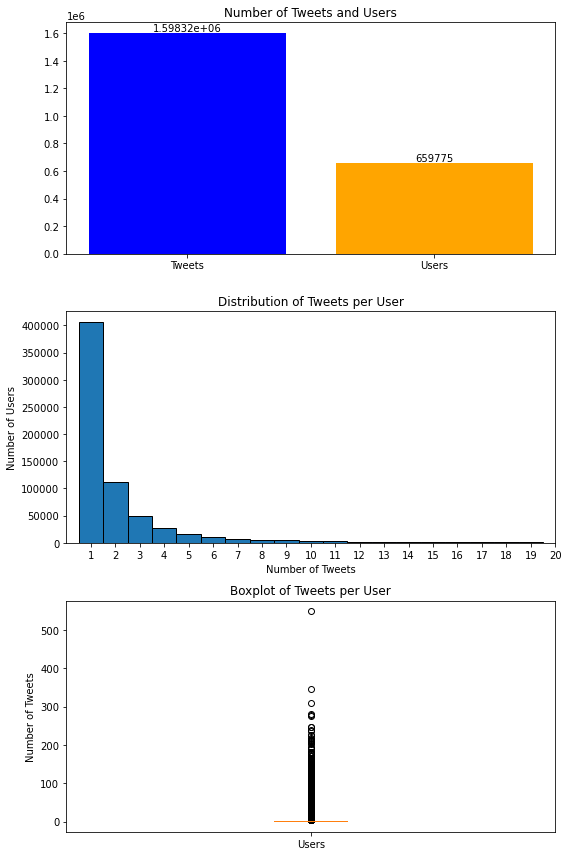

In [12]:
# Count the number of tweets
num_tweets = len(df)

# Count the number of unique users
num_users = df["user"].nunique()

# Count tweets per user
tweets_per_user = df['user'].value_counts()

# Set up a 3x1 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Plot bar chart in the first subplot
bars = axs[0].bar(["Tweets", "Users"], [num_tweets, num_users], color=['blue', 'orange'])
axs[0].bar_label(bars)
axs[0].set_title('Number of Tweets and Users')

# Plot histogram in the second subplot
axs[1].hist(tweets_per_user, bins=range(1, 21), edgecolor='black', align='left')
axs[1].set_title('Distribution of Tweets per User')
axs[1].set_xlabel('Number of Tweets')
axs[1].set_ylabel('Number of Users')
axs[1].set_xticks(range(1, 21))
axs[1].set_xlim(0, 20)

# Plot boxplot in the third subplot
axs[2].boxplot(tweets_per_user)
axs[2].set_title('Boxplot of Tweets per User')
axs[2].set_ylabel('Number of Tweets')
axs[2].set_xticklabels(['Users'])

# Adjust the spacing between plots
plt.tight_layout()

# Display the charts
plt.show()

### Insights from the Graphs:

1. **Tweet-to-User Ratio:**
   - There are approximately 1.598 million tweets in the dataset from about 659,775 unique users.
   - On average, each user has contributed slightly more than 2 tweets. This suggests a mix of users - some tweeted once, while others tweeted multiple times.

2. **Skewness:**
   - The distribution of tweets per user is heavily right-skewed, meaning most users have tweeted a few times, but a few have tweeted many more times than the average.

3. **Boxplot Insights:**
   - The boxplot shows the median and interquartile range is clustered at low tweet counts, while the long whisker and points above demonstrate the outliers in the dataset.

4. **Outliers:**
   - The top 5 users with the most tweets are clear outliers in the distribution. For instance, the user "lost_dog" has tweeted 549 times, which is significantly higher than the typical user in the dataset.

5. **Potential Bias:**
   - While there is some repetition in users, the diverse range of users minimizes bias from repeated users.

6. **Generalization:**
   - The dataset is likely a good representation for sentiment analysis, not heavily influenced by a small group of vocal users.

7. **Impact on Analysis:**
   - The dataset's size means outliers have minimal impact on aggregate metrics, with the median and other percentiles remaining largely unaffected.

In conclusion, this dataset, with its diversity in user representation, is beneficial for sentiment analysis. The potential bias from users tweeting multiple times is present, but it is not significant enough to skew the overall results dramatically.

In [13]:
# Dropping the 'user' column
df = df.drop(columns="user")

# Displaying the first few rows of the updated dataframe
display(df.head())

,Date,text
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


### Notes on Date Transformation:
- The 'Date' column is transformed to a more appropriate format for this analysis. The analysis will be performed by week, month, and trimester, which requires the date to be in the correct format.

In [14]:
# Converting 'Date' column to datetime format and extracting the date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%a %b %d %H:%M:%S PDT %Y').dt.date

# Displaying the first few rows of the dataframe after the date transformation
display(df.head())

,Date,text
0,2009-04-06,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,2009-04-06,is upset that he can't update his Facebook by ...
2,2009-04-06,@Kenichan I dived many times for the ball. Man...
3,2009-04-06,my whole body feels itchy and like its on fire
4,2009-04-06,"@nationwideclass no, it's not behaving at all...."


# Text Preprocessing

In [15]:
# Initialize the WordNet lemmatizer and set of English stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [16]:
def preprocess_text(text):
    """
    Preprocesses the input text by converting to lowercase, removing URLs, user mentions, hashtags,
    punctuation, stopwords, and lemmatizing the remaining words.
    
    Args:
        text (str): The text to be preprocessed.
        
    Returns:
        str: The preprocessed text.
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove punctuation
    no_punctuation = [char for char in text if char not in string.punctuation]
    text = ''.join(no_punctuation)
    
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in stop_words and len(word) > 2])
    
    return text

In [17]:
# Apply the 'preprocess_text' function to the 'text' column and store the result in a new column 'CleanText'
df['CleanText'] = df['text'].apply(preprocess_text)

# Display the first few rows of the dataframe after text preprocessing
display(df.head())

,Date,text,CleanText
0,2009-04-06,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,2009-04-06,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,2009-04-06,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound
3,2009-04-06,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,2009-04-06,"@nationwideclass no, it's not behaving at all....",behaving mad cant see


In [18]:
# Displaying summary statistics of the dataframe
display(df.describe())

,Date,text,CleanText
count,1598315,1598315,1598315
unique,48,1581466,1468619
top,2009-06-06,isPlayer Has Died! Sorry,
freq,111513,210,8707


# Note:
After cleaning, transforming, and preprocessing the text, it seems there might be duplicated texts.  
I will inspect the data further and clean it if necessary.  
Next, I want to view the distribution of tweets over time.  

In [19]:
# Grouping tweets by date and counting the number of tweets on each date
tweets_over_time = df.groupby('Date').size().reset_index()
tweets_over_time.columns = ['Date', 'Tweet_Count']

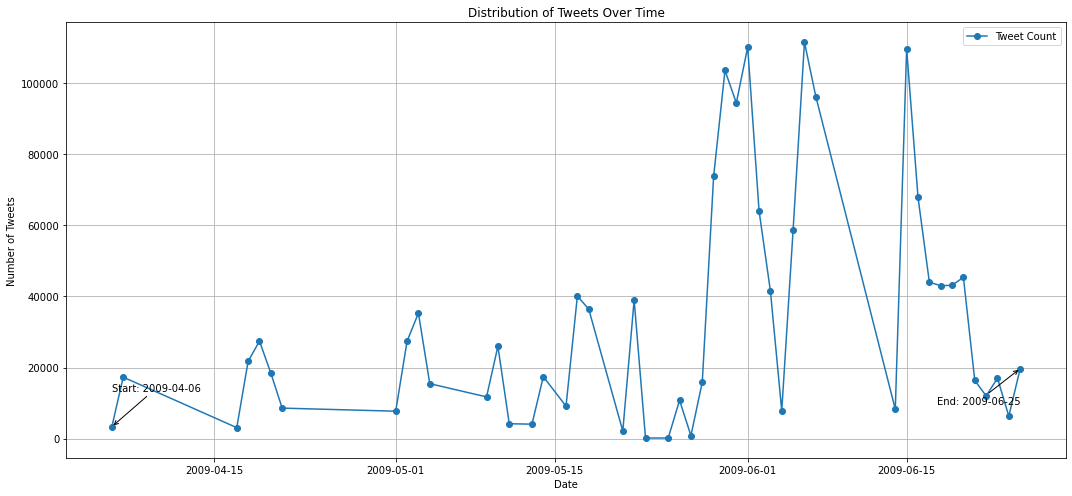

In [20]:
# Plotting the distribution of tweets over time
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(tweets_over_time['Date'], tweets_over_time['Tweet_Count'], marker='o', linestyle='-', label='Tweet Count')
ax.set_title('Distribution of Tweets Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')

# Highlighting the start and end dates of the dataset
start_date = tweets_over_time['Date'].iloc[0]
end_date = tweets_over_time['Date'].iloc[-1]

ax.annotate(f'Start: {start_date.strftime("%Y-%m-%d")}', 
             xy=(start_date, tweets_over_time['Tweet_Count'].iloc[0]), 
             xytext=(start_date, tweets_over_time['Tweet_Count'].iloc[0] + 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left')

ax.annotate(f'End: {end_date.strftime("%Y-%m-%d")}', 
             xy=(end_date, tweets_over_time['Tweet_Count'].iloc[-1]), 
             xytext=(end_date, tweets_over_time['Tweet_Count'].iloc[-1] - 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right')

# Adjusting grid, legend, and layout
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

## Based on the updated graph "Distribution of Tweets Over Time," I have derived several observations:

- **Time Span:** The data spans from April 6, 2009, to June 25, 2009, covering almost three months.

- **Variability:** The number of tweets fluctuates significantly throughout the period, indicating an inconsistency in tweet volume over time.

- **Initial Low Volume:** At the beginning of the period, around April 6, 2009, there's a noticeable low volume of tweets.

- **Significant Peaks:**
    - A prominent peak occurs around mid-May, showcasing a substantial increase in tweet volume.
    - The highest peak is observed in early June, with the tweet count nearing 100,000.

- **Declining Trend Towards the End:** Post the peak in June, there's a sharp decrease in the number of tweets. By the end of the dataset's time range on June 25, 2009, the volume has significantly diminished.

- **Final Rise:** Just before the dataset concludes, there's a minor surge in the number of tweets, possibly indicating a renewed interest or activity in the topic.

# Identifying Trends Post-Text Preprocessing

After preprocessing the text data, I want to inspect the dataset for duplicates to identify if the observed peaks in tweet distribution are related to trends.

In [21]:
# Find the distribution of tweets after text preprocessing
tweet_distribution = df["CleanText"].value_counts()
print(tweet_distribution.head(10))

                                                         8707
thanks                                                   2775
thank                                                    1823
get 100 follower day using add everyone train pay vip    1484
good morning                                             1177
miss                                                     1000
work                                                      894
love                                                      740
know                                                      660
yes                                                       621
Name: CleanText, dtype: int64


## Handling Empty Tweets
Post text preprocessing, I have identified a significant number of empty tweets. Before proceeding to remove these, I should verify that no errors occurred during the preprocessing step.

In [22]:
# Identify rows with empty CleanText
empty_CleanText = df[df['CleanText'].isna() | (df['CleanText'] == "")]

# Display the original "text" for these rows to confirm that they were indeed empty or non-informative
print(empty_CleanText[['text', 'CleanText']])

                          text CleanText
191           @HillyDoP  oH NO          
208                 @mandayyy           
249               @mandayyy             
282      @ITS_NEMESIS -------           
398             @danadearmond           
...                        ...       ...
1598921              If only?           
1599494       @Sworn4DaBosses           
1599552      @francii_ me too           
1599811        to be with you           
1599993      @SCOOBY_GRITBOYS           

[8707 rows x 2 columns]


## Cleaning Data
Now that I have verified the empty tweets are non-informative, I can safely remove them from our dataset.

In [23]:
# Remove rows with empty CleanText
df_cleaned = df[df['CleanText'].notna() & (df['CleanText'] != "")]

# Reset the index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

,Date,text,CleanText
0,2009-04-06,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,2009-04-06,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,2009-04-06,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound
3,2009-04-06,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,2009-04-06,"@nationwideclass no, it's not behaving at all....",behaving mad cant see


In [24]:
# After removing empty rows, analyze the top duplicate tweets again
tweet_distribution = df_cleaned["CleanText"].value_counts()
print(tweet_distribution.head(10))

thanks                                                   2775
thank                                                    1823
get 100 follower day using add everyone train pay vip    1484
good morning                                             1177
miss                                                     1000
work                                                      894
love                                                      740
know                                                      660
yes                                                       621
headache                                                  565
Name: CleanText, dtype: int64


## Analysis of Top Duplicates
After inspecting the dataset for duplicates post-text preprocessing, I observed that:

- **Nature of duplicates:** There are some common phrases, while others are exact duplicates of tweets. The latter may indicate spam or automated tweets.

- **Sentiment ambiguity:** Common phrases like "miss," "work," and "know" are sentiment-ambiguous. Without additional context, it's challenging to ascertain their sentiment, making them less informative for sentiment analysis.

- **Impact on results:** The dataset is large, so removing a few thousand duplicates may not significantly impact the overall results.

Considering these points, I will proceed to remove spam tweets to reduce potential biases, although this may not significantly affect the results.

In [25]:
# Drop rows containing spam phrases
df_cleaned = df_cleaned[df_cleaned['CleanText'] != "get 100 followers a day using add everyone train pay vip"]

# Reset the index post-dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

## Word Frequency Analysis
Analyzing the most common words can provide insights into the main topics or themes prevalent in the tweets.


In [26]:
# word frequency analysis
from collections import Counter

all_words = ' '.join(df_cleaned['CleanText'].astype(str)).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(10)
top_words

[('day', 101130),
 ('good', 89396),
 ('get', 85691),
 ('like', 78994),
 ('love', 66891),
 ('dont', 66828),
 ('work', 66348),
 ('today', 65965),
 ('going', 64007),
 ('time', 63663)]

## Sentiment Analysis
Sentiment analysis will help to comprehend the general emotional tone expressed in the tweets.


In [27]:
# Perform sentiment analysis
from textblob import TextBlob

# Define function to calculate sentiment score
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Define function to categorize sentiment based on score
def get_sentiment_category(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply functions to create new columns
df_cleaned['sentiment_score'] = df_cleaned['CleanText'].apply(get_sentiment_score)
df_cleaned['sentiment_category'] = df_cleaned['sentiment_score'].apply(get_sentiment_category)

df_cleaned.head()


,Date,text,CleanText,sentiment_score,sentiment_category
0,2009-04-06,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,0.000,neutral
1,2009-04-06,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,0.000,neutral
2,2009-04-06,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound,0.500,positive
3,2009-04-06,my whole body feels itchy and like its on fire,whole body feel itchy like fire,0.200,positive
4,2009-04-06,"@nationwideclass no, it's not behaving at all....",behaving mad cant see,-0.625,negative


## Sentiment Distribution Analysis
In this section, I will analyze the distribution of sentiments (positive, neutral, negative) across the tweets in the cleaned dataset.


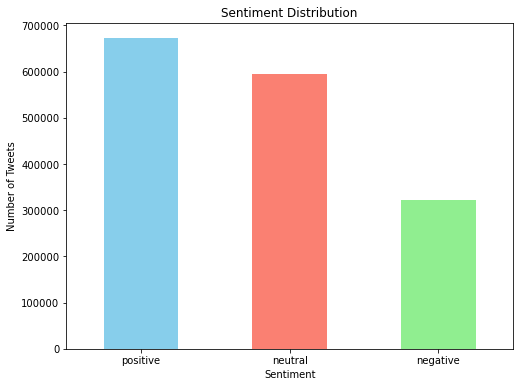

In [28]:
# Drop the text column as it is no longer needed
df_cleaned = df_cleaned.drop(columns="text")

# Calculate the sentiment distribution
sentiment_counts = df_cleaned['sentiment_category'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

### Observations and Conclusion
From the bar chart above, I can observe the following:

1. **Positive Sentiment:** The majority of tweets in the dataset exhibit a positive sentiment. This indicates that, during the time frame of this dataset, the overall sentiment expressed by users was largely positive.

2. **Neutral Sentiment:** The second most frequent category is neutral. This implies that a significant portion of tweets are informational or indifferent in nature, not expressing a strong positive or negative sentiment.

3. **Negative Sentiment:** Although less frequent compared to positive and neutral sentiments, there is still a considerable number of tweets that are classified as negative.

It is important to note that the prevalence of positive sentiments could potentially introduce a bias towards positive sentiments when I train the machine learning models using this dataset.


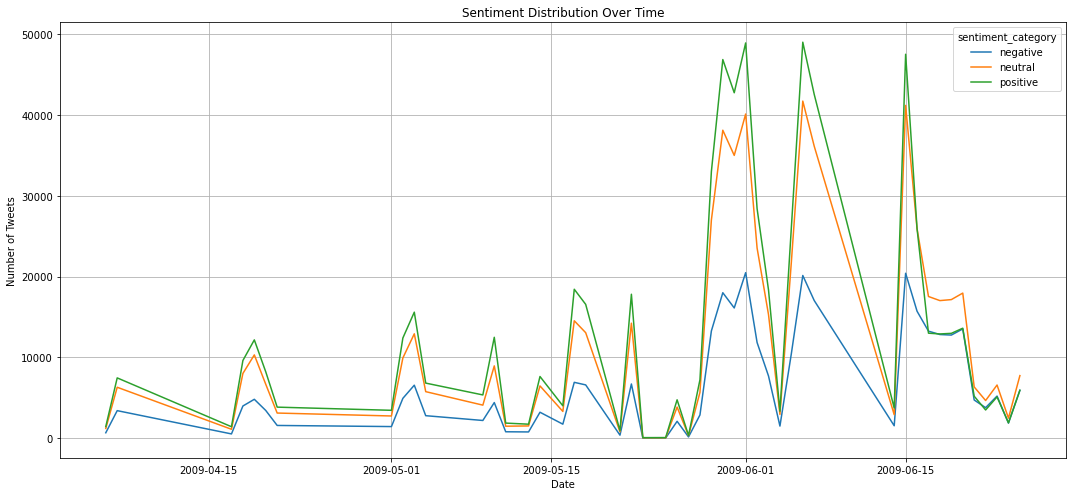

In [29]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Group the data by date and sentiment
grouped_df = df_cleaned.groupby([df_cleaned['Date'].dt.date, 'sentiment_category']).size().reset_index(name='count')

# Pivot the data for better visualization
pivot_df = grouped_df.pivot(index='Date', columns='sentiment_category', values='count').fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 7))
pivot_df.plot(kind='line', ax=ax)
ax.set_title('Sentiment Distribution Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

### Observations and Conclusion
Upon analyzing the distribution of sentiments over time, I can draw the following conclusions:

- The sentiments tend to follow the same general trend as the overall distribution of tweets over time, suggesting that the proportion of each sentiment category remains relatively constant.

- There are no noticeable peaks or declines in any particular sentiment category over time, implying that the relative proportion of positive, neutral, and negative tweets remains stable throughout the dataset's timeframe.



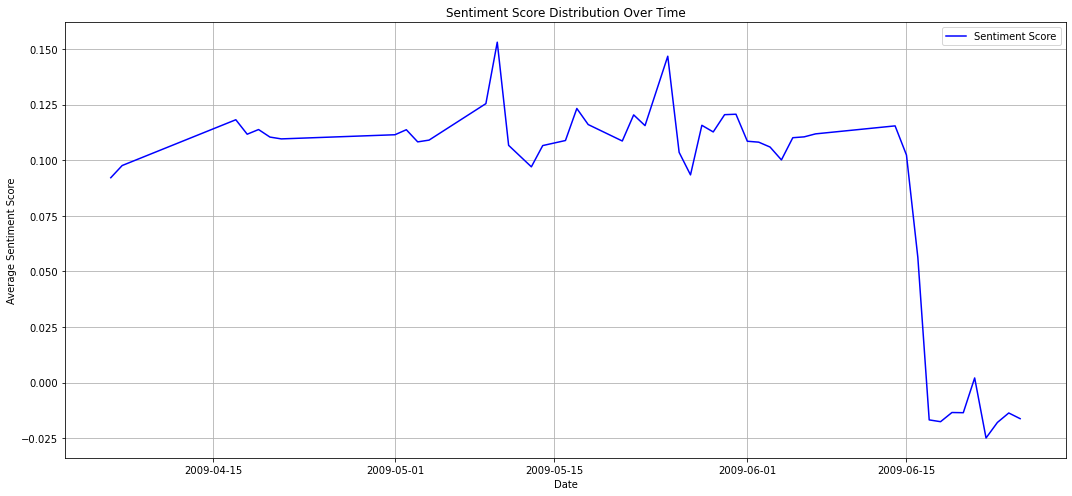

In [30]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Group the data by date and calculate the average sentiment score for each date
grouped_df = df_cleaned.groupby(df_cleaned['Date'].dt.date)['sentiment_score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(grouped_df['Date'], grouped_df['sentiment_score'], label='Sentiment Score', color='blue')
ax.set_title('Sentiment Score Distribution Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment Score')
ax.grid(True, which='both')
plt.tight_layout()
plt.legend()
plt.show()


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
df_cleaned.head()

,Date,CleanText,sentiment_score,sentiment_category
0,2009-04-06,thats bummer shoulda got david carr third day,0.000,neutral
1,2009-04-06,upset cant update facebook texting might cry r...,0.000,neutral
2,2009-04-06,dived many time ball managed save rest bound,0.500,positive
3,2009-04-06,whole body feel itchy like fire,0.200,positive
4,2009-04-06,behaving mad cant see,-0.625,negative


In [35]:
df_cleaned.set_index('Date', inplace=True)
df_cleaned.head()

,CleanText,sentiment_score,sentiment_category
Date,,,
2009-04-06,thats bummer shoulda got david carr third day,0.000,neutral
2009-04-06,upset cant update facebook texting might cry r...,0.000,neutral
2009-04-06,dived many time ball managed save rest bound,0.500,positive
2009-04-06,whole body feel itchy like fire,0.200,positive
2009-04-06,behaving mad cant see,-0.625,negative


In [67]:
df_weekly = df_cleaned.resample('W-MON').mean()
df_weekly.head()

,sentiment_score
Date,
2009-04-06,0.092126
2009-04-13,0.097603
2009-04-20,0.112449
2009-04-27,0.109580
2009-05-04,0.110414


In [68]:
print(f'Number of rows with missing values: {df_weekly.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


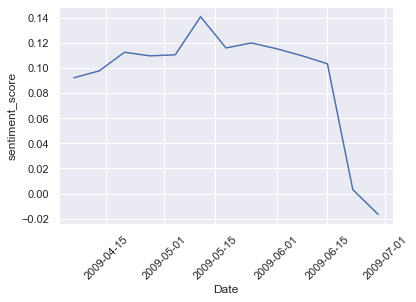

In [69]:
sns.set()
plt.ylabel('sentiment_score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_weekly.index, df_weekly['sentiment_score'], )
plt.show()

In [70]:
result = seasonal_decompose(df_weekly['sentiment_score'], model='additive',period=4)

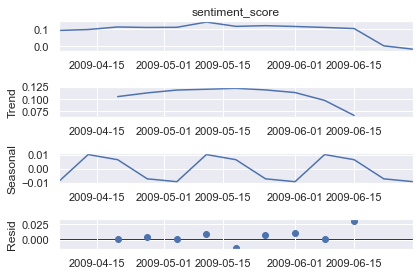

In [71]:
result.plot()
plt.show()


In [74]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Train-test split (e.g., 11 weeks for training)
train = df_weekly['sentiment_score'].iloc[:11]
test = df_weekly['sentiment_score'].iloc[11:]

model = SimpleExpSmoothing(train)
model_fit = model.fit()
forecast = model_fit.forecast(len(test))

# Compare forecast with actual test values

In [77]:
forecast

2009-06-22    0.106387
2009-06-29    0.106387
Freq: W-MON, dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, forecast, squared=False)


In [78]:
rmse

0.11348645177650749

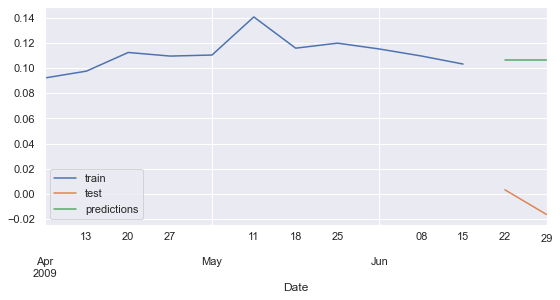

In [80]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
forecast.plot(ax=ax, label='predictions')
ax.legend();

Train dates : 2009-04-06 00:00:00 --- 2009-06-08 00:00:00  (n=10)
Test dates  : 2009-06-15 00:00:00 --- 2009-06-29 00:00:00  (n=3)


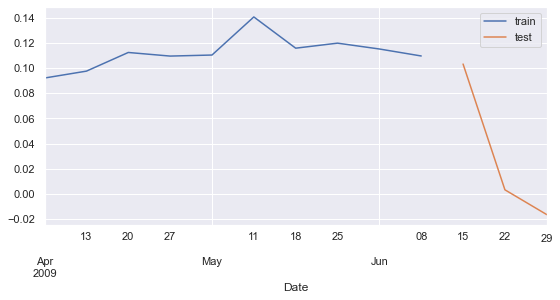

In [73]:
# Split data into train-test
# ==============================================================================
steps = 3
df_weekly_train = df_weekly[:-steps]
df_weekly_test  = df_weekly[-steps:]

print(f"Train dates : {df_weekly_train.index.min()} --- {df_weekly_train.index.max()}  (n={len(df_weekly_train)})")
print(f"Test dates  : {df_weekly_test.index.min()} --- {df_weekly_test.index.max()}  (n={len(df_weekly_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
df_weekly_train['sentiment_score'].plot(ax=ax, label='train')
df_weekly_test['sentiment_score'].plot(ax=ax, label='test')
ax.legend();

In [63]:
df_weekly['detrended'] = df_weekly['sentiment_score'] - result.trend

In [66]:
df_weekly

,sentiment_score,detrended
Date,,
2009-04-06,0.092126,NaN
2009-04-13,0.097603,NaN
2009-04-20,0.112449,0.007224
2009-04-27,0.109580,-0.003320
2009-05-04,0.110414,-0.008301
2009-05-11,0.140711,0.020283
2009-05-18,0.115864,-0.006449
2009-05-25,0.119862,0.000830
2009-06-01,0.115219,0.001645


In [64]:
plt.figure(figsize=(12,6))
plt.plot(df_weekly['Date'], df_weekly['detrended'], label='Detrended Data')
plt.legend(loc='best')
plt.title('Detrended Sentiment Score')
plt.show()

KeyError: 'Date'

<Figure size 864x432 with 0 Axes>

In [49]:
df_monthly = df_cleaned.resample('M').mean()
df_monthly.head()

,sentiment_score
Date,
2009-04-30,0.108954
2009-05-31,0.118093
2009-06-30,0.071463


In [51]:
print(f'Number of rows with missing values: {df_monthly.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


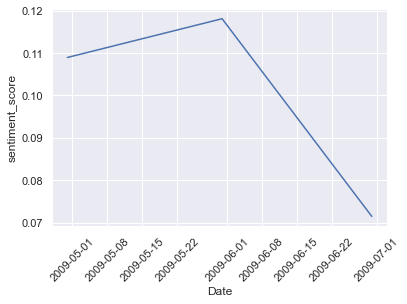

In [53]:
sns.set()
plt.ylabel('sentiment_score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_monthly.index, df_monthly['sentiment_score'], )
plt.show()

In [54]:
df_quarterly = df_cleaned.resample('Q').mean()
df_quarterly.head()

,sentiment_score
Date,
2009-06-30,0.090595
